# 01 — Score de Consumo (Nordeste)
Este notebook carrega `data/processed/ibge/consumo_municipal_NE_2021.csv`, faz QA rápido
e exibe gráficos simples para apoiar o case (peso de demanda, score, top/bottom).

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

BASE = Path.cwd().resolve().parent
csv_path = BASE / "data" / "processed" / "ibge" / "consumo_municipal_NE_2021.csv"

df = pd.read_csv(csv_path)
df.head()

,code_muni,nome_muni,sigla,uf,pop_2021,pib_pc_2021_brl,renda_pc_uf_2024_nominal_brl,adj_pibpc_vs_uf,income_proxy_adj,score_consumo,demand_weight
0,2100055,Açailândia,MA,Maranhão,113783,3364984.0,1077.0,2.000000,2.450886e+08,0.036800,0.002666
1,2100105,Afonso Cunha,MA,Maranhão,6631,128288.0,1077.0,0.500000,3.570794e+06,0.000328,0.000039
2,2100154,Água Doce do Maranhão,MA,Maranhão,12731,798615.0,1077.0,0.561621,7.700541e+06,0.000951,0.000084
3,2100204,Alcântara,MA,Maranhão,22126,67250.0,1077.0,0.500000,1.191485e+07,0.001588,0.000130
4,2100303,Aldeias Altas,MA,Maranhão,26979,924608.0,1077.0,0.650224,1.889317e+07,0.002642,0.000205


In [2]:
# colunas esperadas
expected = {
    "code_muni","nome_muni","sigla","uf","pop_2021","pib_pc_2021_brl",
    "renda_pc_uf_2024_nominal_brl","adj_pibpc_vs_uf","income_proxy_adj",
    "score_consumo","demand_weight"
}
print("Colunas OK? ", expected.issubset(set(df.columns)))

# nulos
print(df.isna().sum().sort_values(ascending=False).head(10))

# estatísticas descritivas
df[["pop_2021","pib_pc_2021_brl","renda_pc_uf_2024_nominal_brl","score_consumo","demand_weight"]].describe()

Colunas OK?  True
code_muni                       0
nome_muni                       0
sigla                           0
uf                              0
pop_2021                        0
pib_pc_2021_brl                 0
renda_pc_uf_2024_nominal_brl    0
adj_pibpc_vs_uf                 0
income_proxy_adj                0
score_consumo                   0
dtype: int64


,pop_2021,pib_pc_2021_brl,renda_pc_uf_2024_nominal_brl,score_consumo,demand_weight
count,1.794000e+03,1.794000e+03,1794.000000,1794.000000,1794.000000
mean,4.160490e+04,1.481597e+06,1353.661093,0.006131,0.000557
std,3.231977e+05,1.977179e+06,139.036875,0.037837,0.003359
min,1.239000e+03,6.725000e+04,1077.000000,0.000000,0.000013
25%,7.644000e+03,8.977815e+05,1331.000000,0.000649,0.000071
50%,1.464750e+04,1.093325e+06,1366.000000,0.001348,0.000133
75%,2.649800e+04,1.444309e+06,1401.000000,0.003058,0.000285
max,1.252651e+07,3.218110e+07,1616.000000,1.000000,0.088778


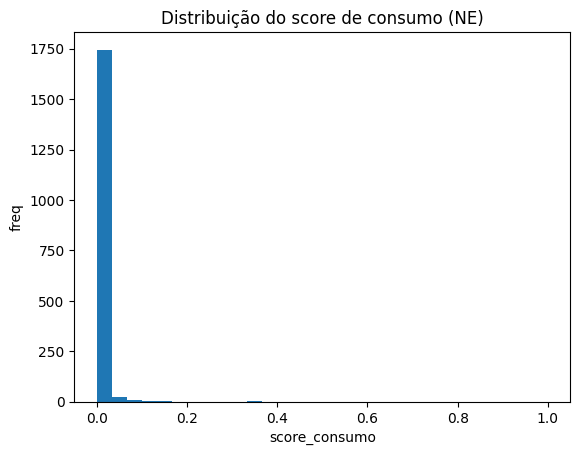

In [8]:
_ = df["score_consumo"].plot(kind="hist", bins=30)
plt.title("Distribuição do score de consumo (NE)")
plt.xlabel("score_consumo")
plt.ylabel("freq")
plt.show()

In [9]:
# Top 10 score
display(df.sort_values("score_consumo", ascending=False)[["code_muni","nome_muni","sigla","score_consumo","demand_weight"]].head(10))

# Bottom 10 score
display(df.sort_values("score_consumo", ascending=True)[["code_muni","nome_muni","sigla","score_consumo","demand_weight"]].head(10))

# Top 10 demand_weight (peso de demanda)
display(df.sort_values("demand_weight", ascending=False)[["code_muni","nome_muni","sigla","demand_weight","score_consumo"]].head(10))

,code_muni,nome_muni,sigla,score_consumo,demand_weight
499,2304400,Fortaleza,CE,1.000000,0.072034
1712,2927408,Salvador,BA,0.850364,0.061257
1146,2611606,Recife,PE,0.728720,0.052497
185,2111300,São Luís,MA,0.362783,0.026142
887,2507507,João Pessoa,PB,0.349217,0.025165
713,2408102,Natal,RN,0.335979,0.024212
432,2211001,Teresina,PI,0.328220,0.023653
1102,2607901,Jaboatão dos Guararapes,PE,0.257020,0.018525
1507,2910800,Feira de Santana,BA,0.233287,0.016816
843,2504009,Campina Grande,PB,0.174897,0.012611


,code_muni,nome_muni,sigla,score_consumo,demand_weight
953,2512788,Riacho de Santo Antônio,PB,0.000000,0.000015
398,2209450,Santo Antônio dos Milagres,PI,0.000010,0.000016
807,2501153,Areia de Baraúnas,PB,0.000011,0.000016
823,2502201,Bom Jesus,PB,0.000062,0.000020
382,2208551,Porto Alegre do Piauí,PI,0.000067,0.000020
321,2205359,João Costa,PI,0.000095,0.000022
790,2414902,Viçosa,RN,0.000112,0.000023
344,2206308,Miguel Leão,PI,0.000113,0.000023
230,2200954,Aroeiras do Itaim,PI,0.000127,0.000024
298,2203859,Floresta do Piauí,PI,0.000136,0.000025


,code_muni,nome_muni,sigla,demand_weight,score_consumo
499,2304400,Fortaleza,CE,0.072034,1.000000
1712,2927408,Salvador,BA,0.061257,0.850364
1146,2611606,Recife,PE,0.052497,0.728720
185,2111300,São Luís,MA,0.026142,0.362783
887,2507507,João Pessoa,PB,0.025165,0.349217
713,2408102,Natal,RN,0.024212,0.335979
432,2211001,Teresina,PI,0.023653,0.328220
1102,2607901,Jaboatão dos Guararapes,PE,0.018525,0.257020
1507,2910800,Feira de Santana,BA,0.016816,0.233287
843,2504009,Campina Grande,PB,0.012611,0.174897


In [10]:
agg = (df.groupby(["sigla","uf"], as_index=False)
         .agg(pop_2021_sum=("pop_2021","sum"),
              peso=("demand_weight","sum"),
              score_med=("score_consumo","mean")))
agg.sort_values("peso", ascending=False).head(12)

,sigla,uf,pop_2021_sum,peso,score_med
1,BA,Bahia,14985284,0.258760,0.008405
5,PE,Pernambuco,9674793,0.200251,0.014819
2,CE,Ceará,9240580,0.170524,0.012657
4,PB,Paraíba,4059905,0.084526,0.005052
3,MA,Maranhão,7153262,0.083325,0.005120
7,RN,Rio Grande do Norte,3560903,0.073060,0.005863
6,PI,Piauí,3289290,0.056397,0.003284
0,AL,Alagoas,3365351,0.041397,0.005424
8,SE,Sergipe,2338474,0.031760,0.005669


In [11]:
fig_dir = BASE / "reports" / "figures"
fig_dir.mkdir(parents=True, exist_ok=True)

# histograma do score
ax = df["score_consumo"].plot(kind="hist", bins=30)
plt.title("Distribuição do score de consumo (NE)")
plt.xlabel("score_consumo"); plt.ylabel("freq")
out = fig_dir / "score_consumo_hist.png"
plt.tight_layout(); plt.savefig(out, dpi=160); plt.close()
out

WindowsPath('C:/Users/Juan/magalu-cd-location/reports/figures/score_consumo_hist.png')